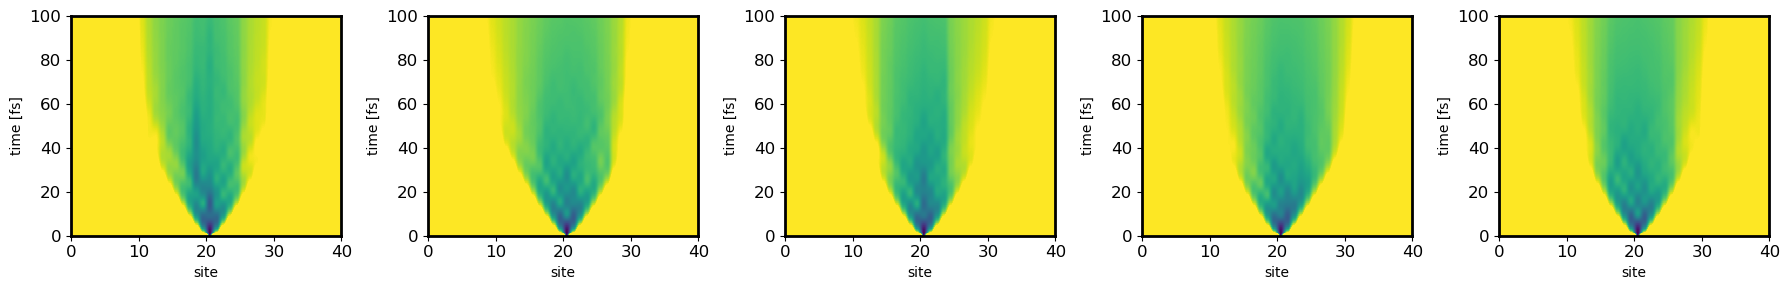

T=200K, last_MSD=47.57117462158203
T=250K, last_MSD=49.369110107421875
T=300K, last_MSD=52.52760696411133
T=350K, last_MSD=52.84397888183594
T=400K, last_MSD=52.38716125488281


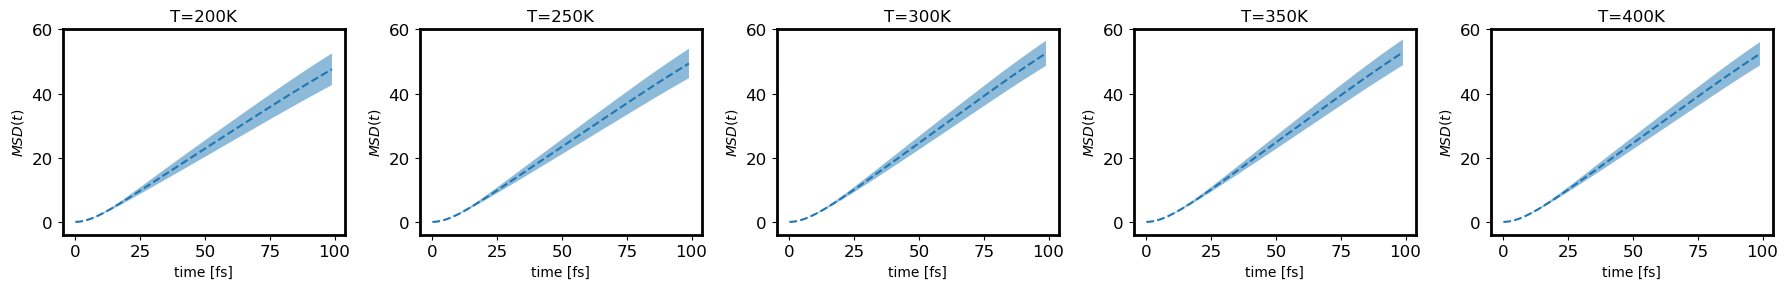

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 5

V = 83
ns = 40
temp_list = [200, 250, 300, 350, 400]

fig, ax = plt.subplots(1, len(temp_list), figsize=(18, 3))
for idx, temp in enumerate(temp_list):
    data_folder = 'T{:.0f}_ns{}'.format(temp, ns)
    x = np.load(os.path.join(data_folder, 'site_occupation_traj.npy'))
    nsample, batchsize, ns = x.shape
    
    batch_idx = 10  # pick an arbitrary trajectory and plot evolvement of site occupation as heatmap
    ax[idx].imshow(-np.log(x[:,batch_idx,:]+1e-10), aspect='auto', cmap='viridis', origin='lower', extent=[0, ns, 0, nsample], vmin=0, vmax=4)
    ax[idx].set_xlabel('site')
    ax[idx].set_ylabel('time [fs]')
plt.tight_layout()
plt.show()
plt.close()

## plot mean squared displacement
fig, ax = plt.subplots(1, len(temp_list), figsize=(18, 3))
for idx, temp in enumerate(temp_list):
    data_folder = 'T{:.0f}_ns{}'.format(temp, ns)
    MSD_traj = np.load(os.path.join(data_folder, 'MSD_traj.npy'))
    t_traj = np.arange(MSD_traj.shape[0])
    ax[idx].plot(t_traj, MSD_traj.mean(-1), '--')
    ax[idx].fill_between(t_traj, MSD_traj.mean(-1)+MSD_traj.std(-1) ,MSD_traj.mean(-1)-MSD_traj.std(-1) , alpha=0.5)
    ax[idx].set_title('T={}K'.format(temp))
    ax[idx].set_xlabel('time [fs]')
    ax[idx].set_ylabel(r'$MSD(t)$')
    ax[idx].set_ylim(-4, 60)
    print('T={}K, last_MSD={}'.format(temp, MSD_traj.mean(-1)[-1]))
plt.tight_layout()
plt.show()
plt.close()



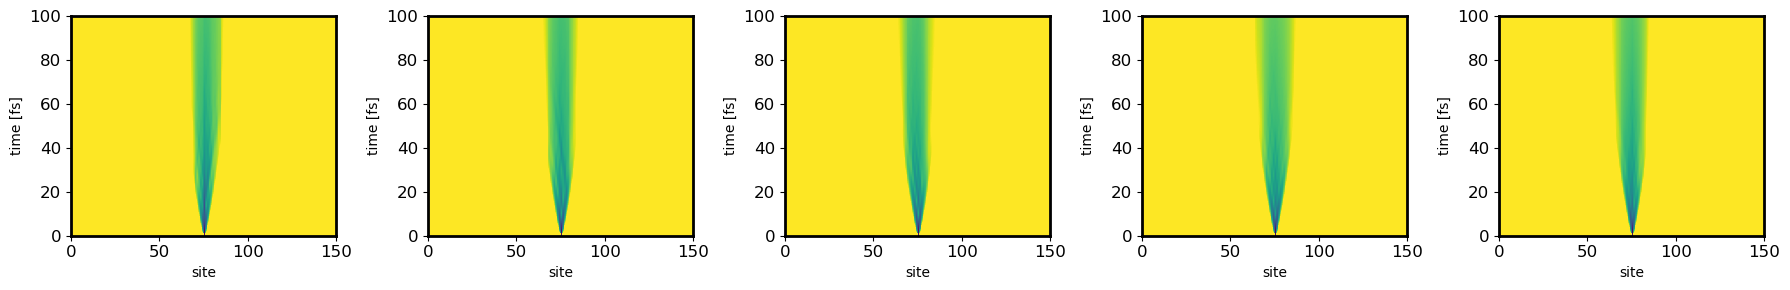

T=200K, last_MSD=48.7149658203125
T=250K, last_MSD=50.396087646484375
T=300K, last_MSD=53.651268005371094
T=350K, last_MSD=53.83381271362305
T=400K, last_MSD=53.13070297241211


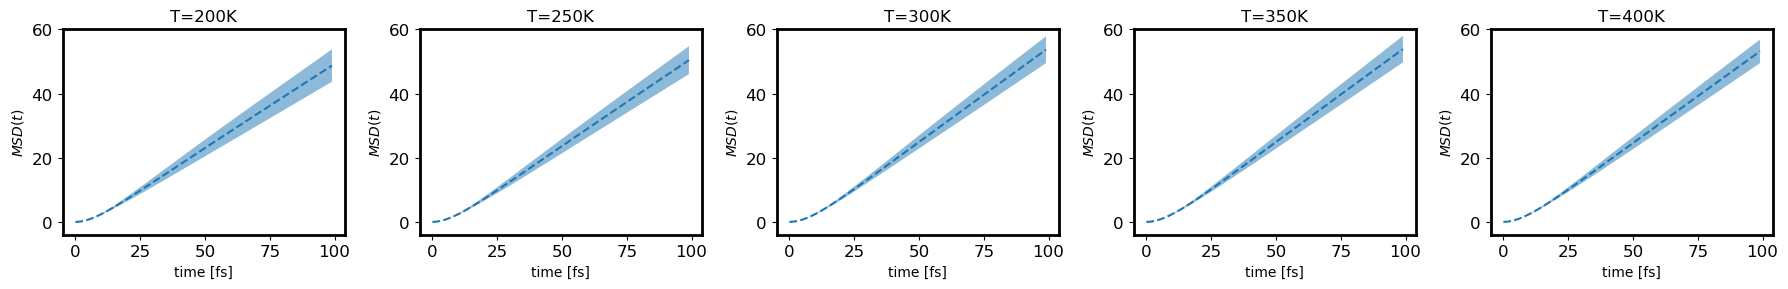

In [3]:
V = 83
ns = 150
temp_list = [200, 250, 300, 350, 400]

fig, ax = plt.subplots(1, len(temp_list), figsize=(18, 3))
for idx, temp in enumerate(temp_list):
    data_folder = 'T{:.0f}_ns{}'.format(temp, ns)
    x = np.load(os.path.join(data_folder, 'site_occupation_traj.npy'))
    nsample, batchsize, ns = x.shape
    
    batch_idx = 10  # pick an arbitrary trajectory and plot evolvement of site occupation as heatmap
    ax[idx].imshow(-np.log(x[:,batch_idx,:]+1e-10), aspect='auto', cmap='viridis', origin='lower', extent=[0, ns, 0, nsample], vmin=0, vmax=4)
    ax[idx].set_xlabel('site')
    ax[idx].set_ylabel('time [fs]')
plt.tight_layout()
plt.show()
plt.close()

## plot mean squared displacement
fig, ax = plt.subplots(1, len(temp_list), figsize=(18, 3))
for idx, temp in enumerate(temp_list):
    data_folder = 'T{:.0f}_ns{}'.format(temp, ns)
    MSD_traj = np.load(os.path.join(data_folder, 'MSD_traj.npy'))
    t_traj = np.arange(MSD_traj.shape[0])
    ax[idx].plot(t_traj, MSD_traj.mean(-1), '--')
    ax[idx].fill_between(t_traj, MSD_traj.mean(-1)+MSD_traj.std(-1) ,MSD_traj.mean(-1)-MSD_traj.std(-1) , alpha=0.5)
    ax[idx].set_title('T={}K'.format(temp))
    ax[idx].set_xlabel('time [fs]')
    ax[idx].set_ylabel(r'$MSD(t)$')
    ax[idx].set_ylim(-4, 60)
    print('T={}K, last_MSD={}'.format(temp, MSD_traj.mean(-1)[-1]))
plt.tight_layout()
plt.show()
plt.close()

## plot figure used in paper

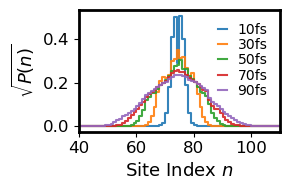

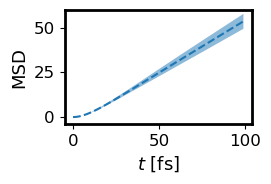

In [29]:
temp= 300
ns = 150
data_folder = 'T{:.0f}_ns{}'.format(temp, ns)
site_occupation_traj = np.load(os.path.join(data_folder, 'site_occupation_traj.npy'))
MSD_traj = np.load(os.path.join(data_folder, 'MSD_traj.npy'))
x = site_occupation_traj[:,0,:] ** 0.5
x = x - x.min()
fig, ax = plt.subplots(1,1,figsize=(3,2))
ax.step(np.arange(ns), x[10], alpha=0.9, label='10fs')
ax.step(np.arange(ns),x[30], alpha=0.9, label='30fs')
ax.step(np.arange(ns),x[50], alpha=0.9, label='50fs')
ax.step(np.arange(ns),x[70], alpha=0.9, label='70fs')
ax.step(np.arange(ns),x[90], alpha=0.9, label='90fs')
ax.set_xlabel(r'Site Index $n$', fontsize=13)
ax.set_ylabel(r'$\sqrt{P(n)}$', fontsize=13)
ax.set_xlim(40, 110)

ax.legend(frameon=False, handlelength=0.6, labelspacing=0.1)
plt.tight_layout()
plt.savefig('site_occupation.png', dpi=200)
plt.show()
plt.close()

fig, ax = plt.subplots(1,1,figsize=(2.8,2))
t_traj = np.arange(MSD_traj.shape[0])
ax.plot(t_traj, MSD_traj.mean(-1), '--')
ax.fill_between(t_traj, MSD_traj.mean(-1)+MSD_traj.std(-1) ,MSD_traj.mean(-1)-MSD_traj.std(-1) , alpha=0.5)
# ax.set_title('T={}K'.format(temp))
ax.set_xlabel(r'$t$ [fs]', fontsize=13)
ax.set_ylabel('MSD', fontsize=13)
ax.set_ylim(-4, 60)
plt.tight_layout()
plt.savefig('MSD.png', dpi=200)
plt.show()
plt.close()